In [1]:
from collections import Counter
import csv
import pandas as pd
import seaborn as sns

def countAminoAcids(file_path):
    """ Returns dict containing the number of amino acids in proteome from fasta file
    @param: String file_path
    """
    aminoacid_count = Counter()
    with open (file_path, 'r') as f:
        for line in f:
            if line[0] != ">":
                line = line.strip()
                aminoacid_count += Counter(line)

    return aminoacid_count

def storeAminoAcidDistribution(outputfile_name, aminoacid_count):
    """ Stores amino acid distribution into csv file
    @param: String file_name: e.g. 'aminoacid_count.csv'
    """
    header = ["aa", "count"]
    with open(outputfile_name, 'w', newline='') as output_file:
        writer = csv.writer(output_file)
        writer.writerow(header)
        for i , (key, value) in enumerate(sorted(aminoacid_count.items())):
            writer.writerow([key, value])

def plotAminoAcidDistributionHistogram(aminoacid_count, species):
    """plots histogram out of amino acid distribution
    
    """
    column_names = ["amino acid","count"]
    aminoacid = []
    counts = []
    for i , (key, value) in enumerate(sorted(aminoacid_count.items())):
        aminoacid.append(key)
        counts.append(value)
    aa_data = pd.DataFrame(list(zip(aminoacid, counts)), columns = column_names)
    #print(aa_data)   
    histogram_aa = sns.barplot(data=aa_data, x="amino acid", y = "count")
    histogram_aa.set_title("Amino acid distribution of {0}".format(species))
    histogram_aa.figure.savefig("aa_distribution_data/Histogram_of_{0}.png".format(species))

def aminoAcidDistribution(file_path, outputfile_name, species):
    aa_count = countAminoAcids(file_path)
    storeAminoAcidDistribution(outputfile_name, aa_count)
    plotAminoAcidDistributionHistogram(aa_count, species)




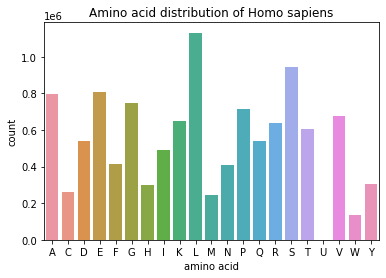

In [2]:
aminoAcidDistribution("aa_distribution_data/uniprot-filtered-organism-human.fasta", 'aa_distribution_data/aminoacid_count_hs.csv', "Homo sapiens")


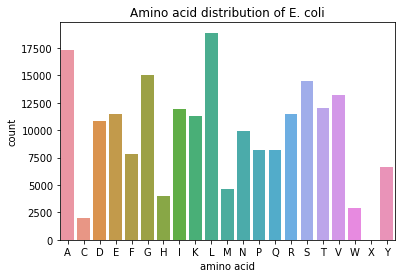

In [3]:
aminoAcidDistribution("aa_distribution_data/uniprot-reviewed-e.coli.fasta", "aa_distribution_data/amino_acid_count_e-coli.csv", "E. coli")

Comparing the proteom of homo sapiens and e. coli shows that there are differences between the proteome of mammals and bacteria. First of all the human proteome is a lot bigger which leads to higher overall counts. Additionally bacteria use the amino acid alanin (A) more often while humans use serin (S) more frequently.